# Recommendation System using PySpark

### Lab Exercises:

1) Demonstrate how to load a dataset suitable for recommendation systems into a PySpark DataFrame.

2) Implement a PySpark script that splits the data and trains a recommendation model.

3) Implement a PySpark script using the ALS algorithm for collaborative filtering.

4) Implement code to evaluate the performance of the recommendation model using appropriate metrics.

In [1]:
#import findspark
#findspark.init()

import os
import sys
import pyspark as ps
import warnings
from pyspark.sql import SQLContext

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

try:
    # create SparkContext on all CPUs available
    sc = ps.SparkContext('local[*]')
    #sqlContext = SQLContext(sc)
    print("Just created a SparkContext")
except ValueError:
    warnings.warn("SparkContext already exists in this scope")

Just created a SparkContext


/home/lplab/anaconda3/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


In [2]:
import unittest
import sys

class TestRdd(unittest.TestCase):
    def test_take(self):
        input = sc.parallelize([1,2,3,4])
        self.assertEqual([1,2,3,4], input.take(4))
        
def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase( TestRdd )
    unittest.TextTestRunner(verbosity=1,stream=sys.stderr).run( suite )

run_tests()

.
----------------------------------------------------------------------
Ran 1 test in 0.811s

OK


In [3]:
import json

fields = ['product_id', 'user_id', 'score', 'time']

fields2 = ['product_id','user_id','review','profile_name','helpfulness','score','time']

fields3 = ['product_id','user_id','time']

fields4 = ['user_id','score','time']

def validate(line):
    for field in fields2:
        if field not in line: return False
    return True

reviews_raw = sc.textFile('movies 1.json')
reviews = reviews_raw.map(lambda line: json.loads(line)).filter(validate)
reviews.cache()

PythonRDD[6] at RDD at PythonRDD.scala:53

In [4]:
reviews.take(1)

[{'user_id': 'A141HP4LYPWMSR',
  'product_id': 'B003AI2VGA',
  'review': 'Synopsis: On the daily trek from Juarez, Mexico to El Paso, Texas an ever increasing number of female workers are found raped and murdered in the surrounding desert. Investigative reporter Karina Danes (Minnie Driver) arrives from Los Angeles to pursue the story and angers both the local police and the factory owners who employee the undocumented aliens with her pointed questions and relentless quest for the truth.<br /><br />Her story goes nationwide when a young girl named Mariela (Ana Claudia Talancon) survives a vicious attack and walks out of the desert crediting the Blessed Virgin for her rescue. Her story is further enhanced when the "Wounds of Christ" (stigmata) appear in her palms. She also claims to have received a message of hope for the Virgin Mary and soon a fanatical movement forms around her to fight against the evil that holds such a stranglehold on the area.<br /><br />Critique: Possessing a life

In [5]:
num_movies = reviews.groupBy(lambda entry: entry['product_id']).count()
num_users = reviews.groupBy(lambda entry: entry['user_id']).count()
num_entries = reviews.count()

print (str(num_entries) + " reviews of " + str(num_movies) + " movies by " +str(num_users) + " different people.")

50000 reviews of 1539 movies by 36409 different people.


In [6]:
#Suggestion_users = reviews.filter(lambda entry: entry['user_id'])

#for review in Suggestion_users.collect():
r1 = reviews.map(lambda r: ((r['product_id'],), 1))
avg3 = r1.mapValues(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: (x[0] + y[0], x[1]+ y[1]))

avg3 = avg3.filter(lambda x: x[1][1] > 20 )
avg3 = avg3.map(lambda x: ((x[1][0]+x[1][1],), x[0])) \
.sortByKey(ascending=False)

In [7]:
for movie in avg3.take(10):
    print ("http://www.amazon.com/dp/" + movie[1][0] + " WATCHED BY : " +str(movie[0][0]) + " PEOPLE")

http://www.amazon.com/dp/B002VL2PTU WATCHED BY : 1338 PEOPLE
http://www.amazon.com/dp/B001NFNFMQ WATCHED BY : 1296 PEOPLE
http://www.amazon.com/dp/B003DBEX6K WATCHED BY : 1252 PEOPLE
http://www.amazon.com/dp/B000KKQNRO WATCHED BY : 1216 PEOPLE
http://www.amazon.com/dp/B000ZLFALS WATCHED BY : 1182 PEOPLE
http://www.amazon.com/dp/B000ZLFALI WATCHED BY : 1182 PEOPLE
http://www.amazon.com/dp/B000063W82 WATCHED BY : 1178 PEOPLE
http://www.amazon.com/dp/B0001G6PZC WATCHED BY : 1090 PEOPLE
http://www.amazon.com/dp/B0083SI986 WATCHED BY : 1062 PEOPLE
http://www.amazon.com/dp/B0014ERKO0 WATCHED BY : 1030 PEOPLE


In [8]:
r2 = reviews.map(lambda ru: ((ru['user_id'],), 1))
avg2 = r2.mapValues(lambda x: (x, 1)).reduceByKey(lambda x, y: (x[0] + y[0], x[1]+ y[1]))
avg2 = avg2.filter(lambda x: x[1][1] > 20 )
avg2 = avg2.map(lambda x: ((x[1][0]+x[1][1],), x[0])).sortByKey(ascending=False )

In [9]:
for movie in avg2.take(10):
    print ("http://www.amazon.com/dp/" + movie[1][0] + " WATCHED : " +str(movie[0][0]) + " MOVIES")

http://www.amazon.com/dp/A3LZGLA88K0LA0 WATCHED : 112 MOVIES
http://www.amazon.com/dp/ANCOMAI0I7LVG WATCHED : 108 MOVIES
http://www.amazon.com/dp/A2NJO6YE954DBH WATCHED : 108 MOVIES
http://www.amazon.com/dp/A328S9RN3U5M68 WATCHED : 106 MOVIES
http://www.amazon.com/dp/A16CZRQL23NOIW WATCHED : 102 MOVIES
http://www.amazon.com/dp/A10ODC971MDHV8 WATCHED : 100 MOVIES
http://www.amazon.com/dp/A35ZK3M8L9JUPX WATCHED : 100 MOVIES
http://www.amazon.com/dp/ABO2ZI2Y5DQ9T WATCHED : 100 MOVIES
http://www.amazon.com/dp/A1GGOC9PVDXW7Z WATCHED : 98 MOVIES
http://www.amazon.com/dp/A7Y6AVS576M03 WATCHED : 94 MOVIES


In [10]:
# Has someone written a review?
filtered = reviews.filter(lambda entry: "George" in entry['profile_name'])
print ("Found " + str(filtered.count()) + " entries.\n")

for review in filtered.collect():
    print ("Rating: " + str(review['score']) + " and helpfulness: " +review['helpfulness'])
    print ("http://www.amazon.com/dp/" + review['product_id'])
    print (review['summary'])
    print (review['review'])
    print ("\n")

Found 102 entries.

Rating: 4.0 and helpfulness: 1/1
http://www.amazon.com/dp/B000NDFLWG
In Debt We Trust
Very enlighteniing on the development of the debt problems we all face especially how we have gotten there with many ideas as to how to decrease our debts and change our purchasing patterns.All families and individuals should view this, an eye opener.


Rating: 5.0 and helpfulness: 10/13
http://www.amazon.com/dp/B0001G6PZC
My Favortite movie by far
Way better than Lord of the Rings. The battle sequences were suberb and stunning. I loved the fighting and plot. Tom Cruise was awesome in acting in this movie. It was also historicly accurate. So you can learn from this film. It was very educational. It deserves some academy awards. If you like movies like Gladiator you'd pamper yourself by coming to this movie


Rating: 5.0 and helpfulness: 3/5
http://www.amazon.com/dp/B0001G6PZC
Epic movie in the traditions of "Braveheart"
Wow, what a movie! First of all, the story line is so intersti

In [11]:
# Get best and worst rated movies
reviews_by_movie = reviews.map(lambda r: ((r['product_id'],), r['score']))
avg = reviews_by_movie.mapValues(lambda x: (x, 1)).reduceByKey(lambda x, y: (x[0] + y[0], x[1]+ y[1]))
avg = avg.filter(lambda x: x[1][1] > 20 )
avg = avg.map(lambda x: ((x[1][0]/x[1][1],), x[0])).sortByKey(ascending=True)

In [12]:
for movie in avg.take(10):
    print ("http://www.amazon.com/dp/" + movie[1][0] + " Rating: " +str(movie[0][0]))

http://www.amazon.com/dp/B000065U30 Rating: 1.9047619047619047
http://www.amazon.com/dp/B000EQ5V8G Rating: 1.9689119170984455
http://www.amazon.com/dp/B000EQ5V86 Rating: 1.9689119170984455
http://www.amazon.com/dp/B001ELC6FG Rating: 2.1666666666666665
http://www.amazon.com/dp/B00005V9I0 Rating: 2.3333333333333335
http://www.amazon.com/dp/B000T12ILY Rating: 2.64
http://www.amazon.com/dp/B00004RQBA Rating: 2.6785714285714284
http://www.amazon.com/dp/B000VII4D6 Rating: 2.783505154639175
http://www.amazon.com/dp/B003JFEIJC Rating: 2.84
http://www.amazon.com/dp/B002FLZKAM Rating: 2.875


### using Spark and Pandas

In [13]:
from datetime import datetime

timeseries_rdd = reviews.map(lambda entry: {'score': entry['score'],'time': datetime.fromtimestamp(entry['time'])})

   score                time
0    5.0 2003-08-10 05:30:00
1    5.0 2003-08-18 05:30:00
2    5.0 2003-01-14 05:30:00


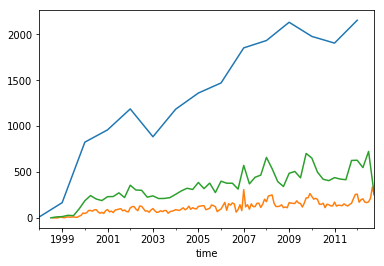

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

sample = timeseries_rdd.sample(withReplacement=False, fraction=20000.0/num_entries, seed=1134)
timeseries = pd.DataFrame(sample.collect(),columns=['score', 'time'])

print(timeseries.head(3))
timeseries.score.astype('float64')
#timeseries.time.astype('datetime64')

timeseries.set_index('time', inplace=True)
Rsample = timeseries.score.resample('Y').count()
Rsample.plot()
Rsample2 = timeseries.score.resample('M').count()
Rsample2.plot()
Rsample3 = timeseries.score.resample('Q').count()
Rsample3.plot()

### Matrix factorization

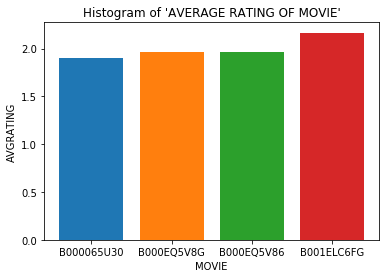

In [15]:
for movie in avg.take(4):
    plt.bar(movie[1][0],movie[0][0])
    plt.title('Histogram of \'AVERAGE RATING OF MOVIE\'')
    plt.xlabel('MOVIE')
    plt.ylabel('AVGRATING')

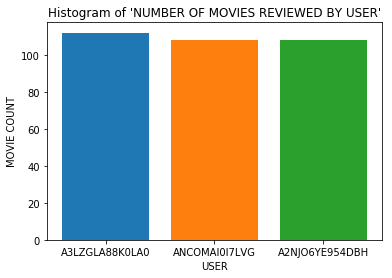

In [16]:
for movie in avg2.take(3):
    plt.bar(movie[1][0],movie[0][0])
    plt.title('Histogram of \'NUMBER OF MOVIES REVIEWED BY USER\'')
    plt.xlabel('USER')
    plt.ylabel('MOVIE COUNT')

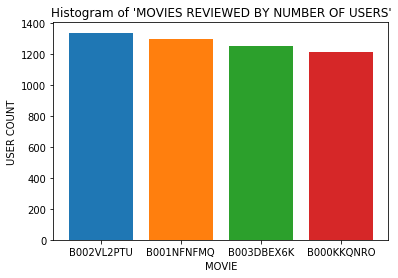

In [17]:
for movie in avg3.take(4):
    plt.bar(movie[1][0],movie[0][0])
    plt.title('Histogram of \'MOVIES REVIEWED BY NUMBER OF USERS\'')
    plt.xlabel('MOVIE')
    plt.ylabel('USER COUNT')

In [18]:
from pyspark.mllib.recommendation import ALS
from numpy import array
import hashlib
import math

def get_hash(s):
    return int(hashlib.sha1(s).hexdigest(), 16) % (10 ** 8)

#Input format: [user, product, rating]
ratings = reviews.map(lambda entry: tuple([ get_hash(entry['user_id'].encode('utf-8')),get_hash(entry['product_id'].encode('utf-8')),int(entry['score']) ]))
train_data = ratings.filter(lambda entry: ((entry[0]+entry[1]) % 10) >=2 )
test_data = ratings.filter(lambda entry: ((entry[0]+entry[1]) % 10) < 2 )
train_data.cache()

#train_data.union(train_data)
print ("Number of train samples: " + str(train_data.count()))
print ("Number of test samples: " + str(test_data.count()))

Number of train samples: 39992
Number of test samples: 10008


In [19]:
# Build the recommendation model using Alternating Least Squares
from math import sqrt

rank = 20
numIterations = 20
model = ALS.train(train_data, rank, numIterations)

def convertToFloat(lines):
    returnedLine = []
    for x in lines:
        returnedLine.append(float(x))
    return returnedLine

# Evaluate the model on test data
unknown = test_data.map(lambda entry: (int(entry[0]),int(entry[1])))
predictions = model.predictAll(unknown).map(lambda r: ((int(r[0]),int(r[1])), r[2]))
true_and_predictions = test_data.map(lambda r: ((int(r[0]), int(r[1])), r[2])).join(predictions)
MSE = true_and_predictions.map(lambda r: (int(r[1][0]) - int(r[1][1])**2).reduce(lambda x, y: x + y)/true_and_predictions.count())

In [21]:
true_and_predictions.take(10)

[((65965270, 62577830), (5, 2.2608337778104173)),
 ((7383110, 62577830), (5, 1.303017858827334)),
 ((22477285, 58302865), (4, -0.00265492261065442)),
 ((5479805, 58302865), (5, 0.41932472643341356)),
 ((39998009, 30926631), (3, 4.5554259581755225)),
 ((56482098, 109252), (3, 0.07788551027553697)),
 ((89302666, 43077444), (3, 1.9712146032084286)),
 ((6480656, 80115934), (5, 5.006393840933958)),
 ((19486884, 36531906), (4, 1.8161641680805511)),
 ((99927280, 47280600), (5, 0.7705703254749243))]

### Word count example

In [27]:
min_occurrences = 10
good_reviews = reviews.filter(lambda line: line['score']==5.0)
bad_reviews = reviews.filter(lambda line: line['score']==1.0)

good_words = good_reviews.flatMap(lambda line: line['review'].split(' '))
num_good_words = good_words.count()

good_words = good_words.map(lambda word: (word.strip(), 1)) \
.reduceByKey(lambda a, b: a+b) \
.filter(lambda word_count: word_count[1] >min_occurrences)

bad_words = bad_reviews.flatMap(lambda line: line['review'].split(' '))
num_bad_words = bad_words.count()

bad_words = bad_words.map(lambda word: (word.strip(), 1)) \
.reduceByKey(lambda a, b: a+b) \
.filter(lambda word_count: word_count[1] > min_occurrences)

In [28]:
# Calculate the word frequencies
frequency_good = good_words.map(lambda word: ((word[0],), float(word[1])/num_good_words))
frequency_bad = bad_words.map(lambda word: ((word[0],), float(word[1])/num_bad_words))

In [29]:
# Join the word frequencies of the good and bad reviews
joined_frequencies = frequency_good.join(frequency_bad)

In [30]:
# Calculate the relative difference of each word frequency in the good and bad reviews.
# Sort the dataset to get the most significant expressions for the characterization of either a positively
# or negatively rated movie.
import math

def relative_difference(a, b):
    return math.fabs(a-b)/a

result = joined_frequencies.map(lambda f: ((relative_difference(f[1][0],f[1][1]),), f[0][0]) ).sortByKey(ascending=False)

In [31]:
result.take(15)

[((31.56125203626583,), 'awful.'),
 ((30.02178160100973,), 'terrible.'),
 ((27.146167014399275,), 'Save'),
 ((26.694624228072016,), 'Kingsley'),
 ((26.052808695304964,), 'waste'),
 ((24.386738875732682,), 'redeeming'),
 ((22.179196364799406,), 'stupid.'),
 ((21.205280551152374,), 'crap.'),
 ((19.443763253425562,), 'worst'),
 ((18.26582554996314,), 'mess.'),
 ((15.73718594653048,), 'poorly'),
 ((14.728740390399597,), 'Bloodrayne'),
 ((14.452797576532936,), 'Kristanna'),
 ((13.569780572159626,), 'wasted'),
 ((13.449369162472356,), 'refund')]

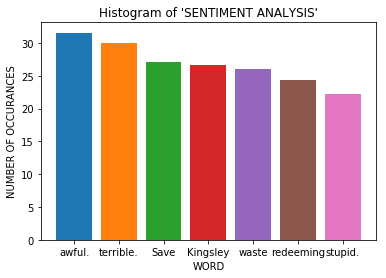

In [32]:
for movie in result.take(7):
    plt.bar(movie[1],movie[0][0])
    plt.title('Histogram of \'SENTIMENT ANALYSIS\'')
    plt.xlabel('WORD')
    plt.ylabel('NUMBER OF OCCURANCES')